### Homework 2

1. (a) Transition matrix P

In [145]:
import numpy as np

P = np.array([[0,   1, 0,   0],
              [1/3, 0, 1/3, 1/3],
              [0,   0, 0,   1],
              [1,   0, 0,   0]
])

print(P)

[[0.         1.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [1.         0.         0.         0.        ]]


(b) Google matrix G

In [146]:
S = np.zeros_like(P)

N = [1, 3, 1, 1]
n = 4

row, col = P.shape

for i in range(row):
    for j in range(col):
        if N[i] == 0:
            S[i][j] = P[i][j] + 1/n
        elif N[i] > 0:
            S[i][j] = P[i][j]

print(S) 

[[0.         1.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [1.         0.         0.         0.        ]]


In [147]:
alpha = 0.85
print(n)

G = alpha * S + (1-alpha)/n

print(G)

4
[[0.0375     0.8875     0.0375     0.0375    ]
 [0.32083333 0.0375     0.32083333 0.32083333]
 [0.0375     0.0375     0.0375     0.8875    ]
 [0.8875     0.0375     0.0375     0.0375    ]]


(c) Use G matrix and $\alpha$ above, rank the webpages with fullrank algorithm. Use the power method to approximate the staionary distribution $\pi_\infty$ with 5 iterations from $ \pi_0 = [0.25, 0.25, 0.25, 0.25]^T $

In [148]:
def power(pi_kminus1):
    pi_k = G.T @ pi_kminus1
    return pi_k

# \pi_0
pi_kminus1 = np.array([
                [0.25], [0.25], [0.25], [0.25]])
# \pi_1
pi_k = power(pi_kminus1)

pi = []
pi.append(pi_kminus1)
pi.append(pi_k)


for i in range(4):
    # print(i)
    pi_kminus1 = pi_k
    pi_k = power(pi_kminus1)
    pi.append(pi_k)

print(pi)


[array([[0.25],
       [0.25],
       [0.25],
       [0.25]]), array([[0.32083333],
       [0.25      ],
       [0.10833333],
       [0.32083333]]), array([[0.38104167],
       [0.31020833],
       [0.10833333],
       [0.20041667]]), array([[0.29574653],
       [0.36138542],
       [0.12539236],
       [0.21747569]]), array([[0.32474687],
       [0.28888455],
       [0.13989253],
       [0.24647604]]), array([[0.32885526],
       [0.31353484],
       [0.11935062],
       [0.23825928]])]


In [149]:
# \pi_0
pi_0 = np.array([
                [0.25], [0.25], [0.25], [0.25]])
# \pi_1
pi_1 = power(pi_0)

# \pi_2
pi_2 = power(pi_1)

# \pi_3
pi_3 = power(pi_2)

# \pi_4
pi_4 = power(pi_3)

# \pi_5
pi_5 = power(pi_4)


print(pi_5)

[[0.32885526]
 [0.31353484]
 [0.11935062]
 [0.23825928]]


2. (a) svd

In [150]:
X = np.array([ [3, 2, 2],
               [2, 3, -2] ])

U, s, Vt = np.linalg.svd(X)

print('U:\n', U)

print('S:\n', np.diag(s))

print('V:\n', Vt.T)

U:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
S:
 [[5. 0.]
 [0. 3.]]
V:
 [[-7.07106781e-01 -2.35702260e-01 -6.66666667e-01]
 [-7.07106781e-01  2.35702260e-01  6.66666667e-01]
 [-6.47932334e-17 -9.42809042e-01  3.33333333e-01]]


(b) What is the best rank-1 approximation of X in the sense of minimising
the approximation error under the Frobenius norm?


In [151]:
import numpy as np

X = np.array([[3, 2, 2], [2, 3, -2]])
U, s, Vt = np.linalg.svd(X, full_matrices = False)

# construct diagonal matrix of singular values
rS = np.ceil(s[0])
# print(rS)

# compute rank-1 approximation
# first column of U
U1 = U[:,:1]
#  first row of V
Vt1 = Vt[:1]

X1 = rS * np.outer(U1, Vt1)
print(X1)


[[2.50000000e+00 2.50000000e+00 2.29078674e-16]
 [2.50000000e+00 2.50000000e+00 2.29078674e-16]]


3. Principal Component Analysis

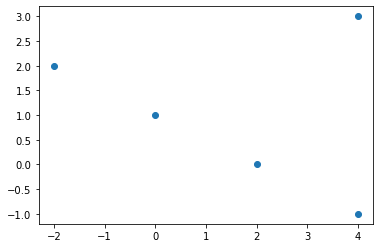

In [152]:
X = np.array([  [ 4,  3],
                [ 0,  1],
                [-2,  2],
                [ 4, -1],
                [ 2,  0]  ])
# print(X)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [153]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [154]:
print(pca.components_)

print(pca.explained_variance_)

[[-0.97640184  0.21596167]
 [ 0.21596167  0.97640184]]
[7.02118114 2.27881886]


[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

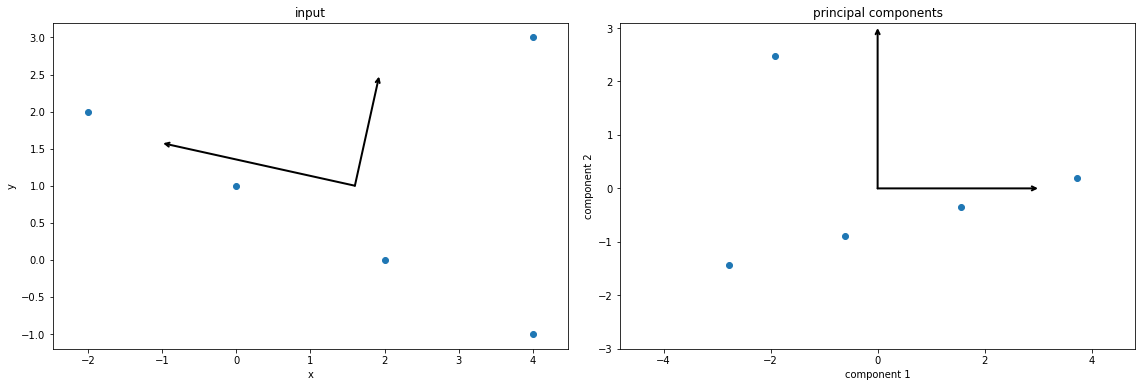

In [155]:
"""
The below visualization code was developed with reference to: 
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
"""

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.06, right = 1, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_re = pca.transform(X)
ax[1].scatter(X_re[:, 0], X_re[:, 1])
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

In [160]:
pca = PCA(n_components=1)
pca.fit(X)
X_1d = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_1d.shape)

print(X_1d)

original shape:    (5, 2)
transformed shape: (5, 1)
[[-1.91144107]
 [ 1.56224295]
 [ 3.7310083 ]
 [-2.77528776]
 [-0.60652241]]


Plotting 1d projected datapoints

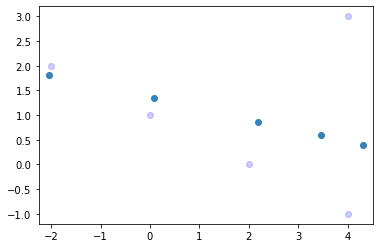

In [159]:
proj_X = pca.inverse_transform(X_1d)

plt.scatter(proj_X[:, 0], proj_X[:, 1], alpha=0.9)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, c = 'b')
plt.axis('equal');